In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (24.1 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/test_image.jpg: 416x640 1 number_plate, 45.5ms
Speed: 12.3ms preprocess, 45.5ms inference, 419.9ms postprocess per image at shape (1, 3, 416, 640)


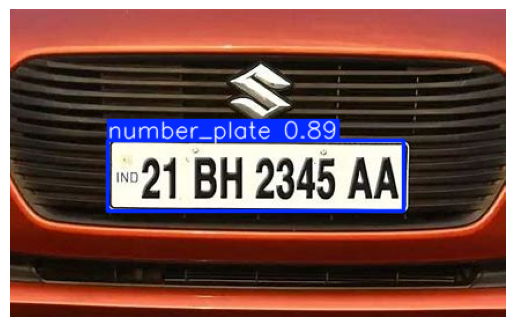

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO("best.pt")
image_path = "test_image.jpg"
results = model(image_path)
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


image 1/1 /content/test_image.jpg: 416x640 1 number_plate, 13.4ms
Speed: 1.9ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


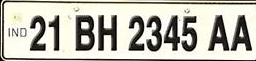

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # ✅ Import this for Colab

# Load model and image
model = YOLO("best.pt")
image_path = "test_image.jpg"
image = cv2.imread(image_path)

# Run YOLO model
results = model(image_path)

# Extract bounding box coordinates
for result in results:
    for box in result.boxes.xyxy:  # xyxy format: (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box)

        # Crop the detected number plate
        cropped_plate = image[y1:y2, x1:x2]
        cv2.imwrite("cropped_plate.jpg", cropped_plate)  # Save the cropped image

        # Show cropped plate in Colab
        cv2_imshow(cropped_plate)  # ✅ Use this instead of cv2.imshow()

Extracted Text: 21BH2345AA


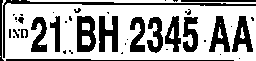

In [ ]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image_path = "cropped_plate.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply morphological operations to remove noise
kernel = np.ones((2,2), np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Apply adaptive thresholding
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Perform OCR with better configuration
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(gray, config=custom_config)

# Show results
print("Extracted Text:", text.strip())
cv2_imshow(gray)

In [ ]:
!pip install paddleocr
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1353fc151b2875040754ca020e249cbd1cfe14d0bd14a5f9431810c28dad58bd
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found e

In [ ]:
!pip install paddlepaddle-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.0/759.0 MB 2.4 MB/s eta 0:00:00


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 133.26it/s]

[2025/03/25 08:54:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

[2025/03/25 08:54:57] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2025/03/25 08:54:58] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2025/03/25 08:55:00] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.2158339023590088
[2025/03/25 08:55:00] ppocr DEBUG: cls num  : 2, elapsed : 0.14570260047912598
[2025/03/25 08:55:00] ppocr DEBUG: rec_res num  : 2, elapsed : 0.04248857498168945
Detected Text: 21BH 2345 AA | Confidence: 0.94
Detected Text: NE | Confidence: 0.89


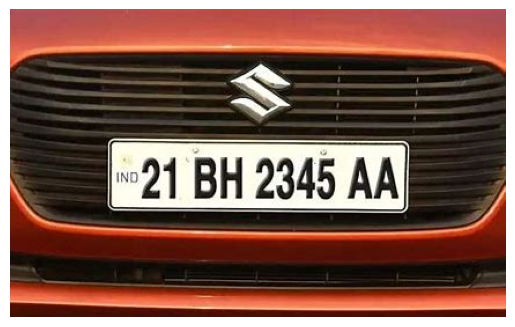

In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import matplotlib.pyplot as plt

# Initialize OCR Model
ocr = PaddleOCR(use_angle_cls=True, lang="en")

# Load Image
image_path = "test_image.jpg"
result = ocr.ocr(image_path, cls=True)

# Display OCR Results
for res in result[0]:
    _, (text, confidence) = res
    print(f"Detected Text: {text} | Confidence: {confidence:.2f}")

# Load image and draw results
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


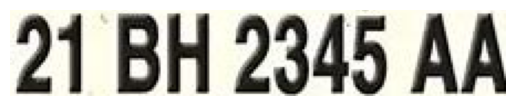

In [ ]:
import numpy as np

# Get the first detected bounding box (assuming the number plate is the first detection)
if result[0]:
    box = result[0][0][0]  # Coordinates of bounding box

    # Convert to integer values
    box = np.array(box).astype(int)

    # Load image
    image = cv2.imread(image_path)

    # Crop the detected number plate region
    x_min, y_min = box.min(axis=0)
    x_max, y_max = box.max(axis=0)
    cropped_plate = image[y_min:y_max, x_min:x_max]

    # Save or display the cropped number plate
    cv2.imwrite("cropped_plate.jpg", cropped_plate)

    # Show cropped plate
    plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
from paddleocr import PaddleOCR
import cv2
import matplotlib.pyplot as plt

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Load the image
image_path = "test_image.jpg"  # Change to your image path
image = cv2.imread(image_path)

# Run OCR on the image
result = ocr.ocr(image_path, cls=True)


[2025/03/25 08:55:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

In [ ]:
for line in result:
    for word_info in line:
        text, confidence = word_info[1]
        print(f"Detected Text: {text}, Confidence: {confidence:.2f}")


Detected Text: 21BH 2345 AA, Confidence: 0.94
Detected Text: NE, Confidence: 0.89
